In [1]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline 
import matplotlib.pyplot as plt

In [2]:
cell_df = pd.read_csv("clevBinary.csv")
cell_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


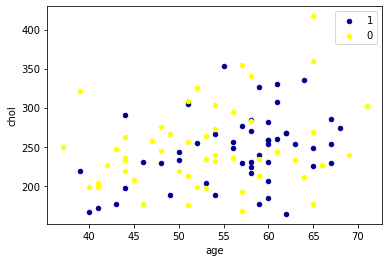

In [3]:
ax = cell_df[cell_df['num'] == 1][0:50].plot(kind='scatter', x='age', y='chol', color='DarkBlue', label='1');
cell_df[cell_df['num'] == 0][0:50].plot(kind='scatter', x='age', y='chol', color='Yellow', label='0', ax=ax);
plt.show()

In [4]:
cell_df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
num           int64
dtype: object

In [5]:
feature_df = cell_df[['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']]
X = np.asarray(feature_df)
X[0:5]

array([[ 63. ,   1. ,   1. , 145. , 233. ,   1. ,   2. , 150. ,   0. ,
          2.3,   3. ,   0. ,   6. ],
       [ 67. ,   1. ,   4. , 160. , 286. ,   0. ,   2. , 108. ,   1. ,
          1.5,   2. ,   3. ,   3. ],
       [ 67. ,   1. ,   4. , 120. , 229. ,   0. ,   2. , 129. ,   1. ,
          2.6,   2. ,   2. ,   7. ],
       [ 37. ,   1. ,   3. , 130. , 250. ,   0. ,   0. , 187. ,   0. ,
          3.5,   3. ,   0. ,   3. ],
       [ 41. ,   0. ,   2. , 130. , 204. ,   0. ,   2. , 172. ,   0. ,
          1.4,   1. ,   0. ,   3. ]])

In [6]:
cell_df['num'] = cell_df['num'].astype('int')
y = np.asarray(cell_df['num'])
y [0:5]

array([0, 1, 1, 0, 0])

In [7]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[ 0.93618065,  0.69109474, -2.24062879,  0.75038004, -0.27644339,
         2.43042728,  1.01019851,  0.01749443, -0.69641941,  1.06896529,
         2.26414539, -0.72197605,  0.65587737],
       [ 1.3789285 ,  0.69109474,  0.87388018,  1.59626645,  0.74455507,
        -0.41145029,  1.01019851, -1.81633388,  1.43591632,  0.38177332,
         0.6437811 ,  2.47842525, -0.89422007],
       [ 1.3789285 ,  0.69109474,  0.87388018, -0.65943064, -0.35349988,
        -0.41145029,  1.01019851, -0.89941972,  1.43591632,  1.32666228,
         0.6437811 ,  1.41162482,  1.17257652],
       [-1.94168041,  0.69109474, -0.16428947, -0.09550637,  0.05104668,
        -0.41145029, -1.00341866,  1.63300986, -0.69641941,  2.09975324,
         2.26414539, -0.72197605, -0.89422007],
       [-1.49893255, -1.44697961, -1.20245913, -0.09550637, -0.83510292,
        -0.41145029,  1.01019851,  0.97807117, -0.69641941,  0.29587432,
        -0.97658319, -0.72197605, -0.89422007]])

In [8]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (237, 13) (237,)
Test set: (60, 13) (60,)


In [9]:
from sklearn import svm
clf = svm.SVC(kernel='sigmoid')
clf.fit(X_train, y_train) 

SVC(kernel='sigmoid')

In [10]:
yhat = clf.predict(X_test)
yhat [0:5]

array([1, 0, 0, 1, 0])

In [11]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [12]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           0       0.88      0.94      0.91        31
           1       0.93      0.86      0.89        29

    accuracy                           0.90        60
   macro avg       0.90      0.90      0.90        60
weighted avg       0.90      0.90      0.90        60

Confusion matrix, without normalization
[[29  2]
 [ 4 25]]


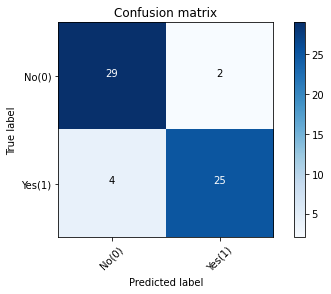

In [13]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[0,1])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['No(0)','Yes(1)'],normalize= False,  title='Confusion matrix')

In [14]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat,pos_label=1)

0.8064516129032258

In [15]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted') 

0.8997767857142858